In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from matplotlib.pyplot import acorr
print sys.version

2.7.11 (default, Dec  5 2015, 14:44:47) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.1.76)]


In [292]:
x = np.linspace(1,100,100)


## Question 2

#### Part A - Housing Starts

In [293]:
# read in housing start data
data = pd.read_csv('http://people.stern.nyu.edu/churvich/Forecasting/Data/HousingStarts.CSV')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 2 columns):
Year             56 non-null int64
HousingStarts    56 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


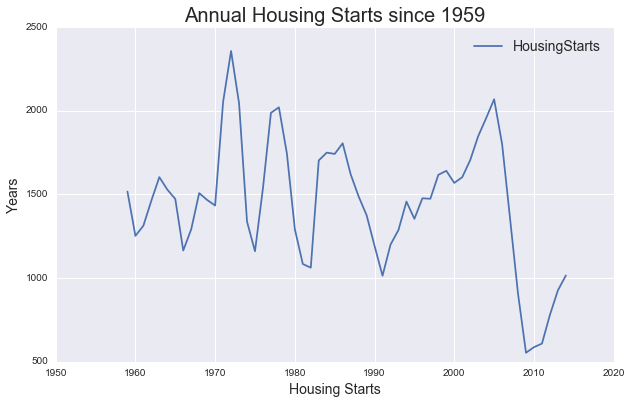

In [294]:
# plot our housing starts
fig, ax = plt.subplots(figsize = (10,6))
plt.plot(data.Year,data.HousingStarts)
plt.title('Annual Housing Starts since 1959', fontsize = 20)
plt.xlabel('Housing Starts', fontsize = 14)
plt.ylabel('Years', fontsize = 14)
plt.legend(fontsize = 14)

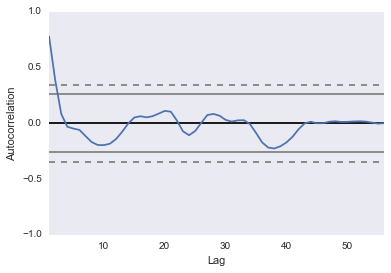

In [295]:
# creat the ACF plot
autocorrelation_plot(data['HousingStarts'])

In [296]:
# then prepare the data for PACF; note that it needs to be fed an array (i used numpy for this)
pacf_array = (data['HousingStarts'].as_matrix())
pacf_array

array([ 1517. ,  1252.2,  1313. ,  1462.9,  1603.2,  1528.8,  1472.8,
        1164.9,  1291.6,  1507.6,  1466.8,  1433.6,  2052.2,  2356.6,
        2045.3,  1337.7,  1160.4,  1537.5,  1987.1,  2020.3,  1745.1,
        1292.2,  1084.2,  1062.2,  1703. ,  1749.5,  1741.8,  1805.4,
        1620.5,  1488.1,  1376.1,  1192.7,  1013.9,  1199.7,  1287.6,
        1457. ,  1354.1,  1476.8,  1474. ,  1616.9,  1640.9,  1568.7,
        1602.7,  1704.9,  1847.7,  1955.8,  2068.3,  1800.9,  1355. ,
         905.5,   554. ,   587.6,   608.8,   780.6,   926.9,  1015.6])

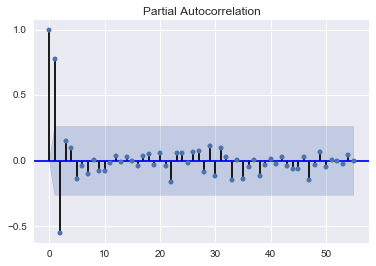

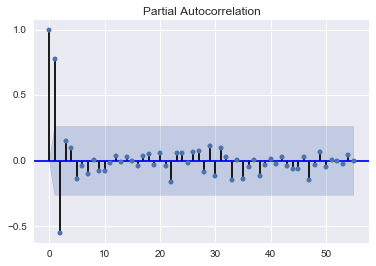

In [297]:
# then we plot the PACF
plot_pacf(pacf_array)

In [298]:
# arima(1,1,3)

#### Part B - GDP

In [325]:
# read in data
gdp = pd.read_csv('http://people.stern.nyu.edu/churvich/Forecasting/Data/GDP.CSV')
# convert date column to actual datetime
gdp.DATE = pd.to_datetime(gdp.DATE)
gdp.tail()

,DATE,GDP
268,2014-01-01,15831.652
269,2014-04-01,16010.405
270,2014-07-01,16205.591
271,2014-10-01,16294.699
272,2015-01-01,16287.692


In [300]:
# add log column
gdp['Log of GDP'] = np.log(gdp.GDP)
# add difference of log columns
gdp['diff_log_gdp'] = gdp['Log of GDP'] - gdp['Log of GDP'].shift(periods = -1)
gdp.set_index(gdp.DATE, inplace = True)
gdp = gdp[:267]

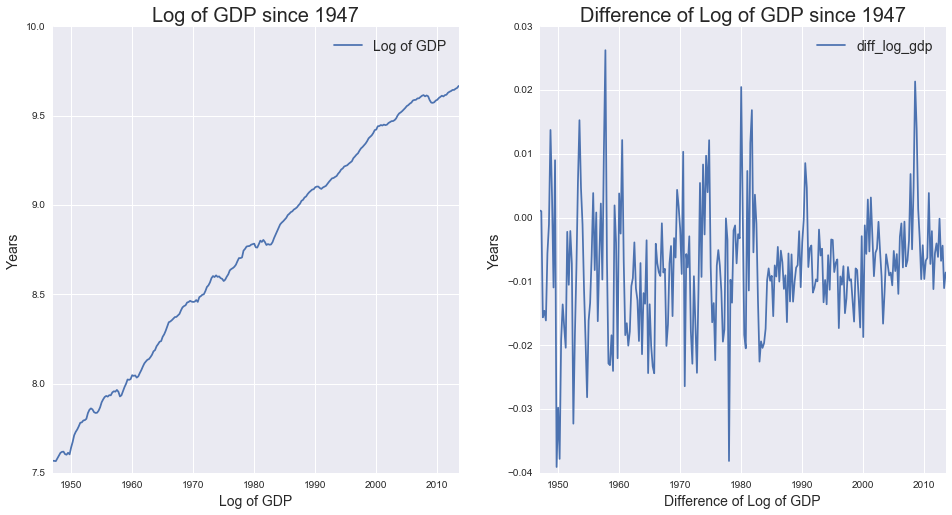

In [301]:
# plot the log of the gdp
fig, ax = plt.subplots(figsize = (16,8))
plt.subplot(121)
plt.plot(gdp['Log of GDP'])
plt.title('Log of GDP since 1947', fontsize = 20)
plt.xlabel('Log of GDP', fontsize = 14)
plt.ylabel('Years', fontsize = 14)
plt.legend(fontsize = 14)

# plot the log of the gdp
plt.subplot(122)
plt.plot(gdp['diff_log_gdp'])
plt.title('Difference of Log of GDP since 1947', fontsize = 20)
plt.xlabel('Difference of Log of GDP', fontsize = 14)
plt.ylabel('Years', fontsize = 14)
plt.legend(fontsize = 14)

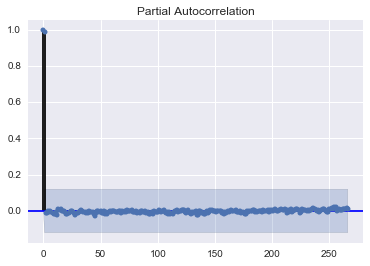

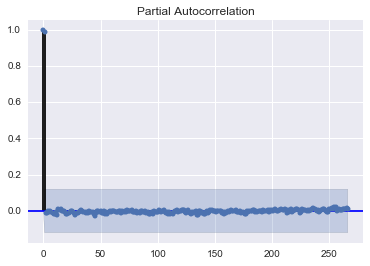

In [302]:
pacf_array = np.asarray(gdp['Log of GDP'])
plot_pacf(pacf_array)

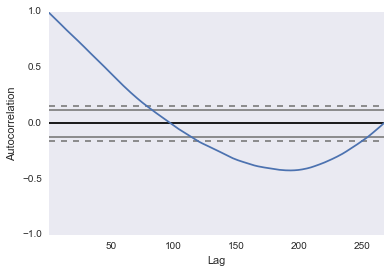

In [303]:
gdp_ac = autocorrelation_plot(gdp['Log of GDP'])
gdp_ac

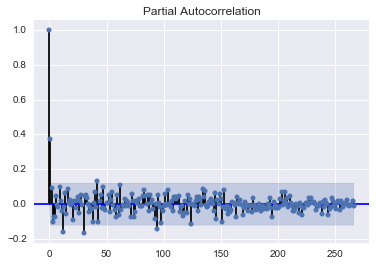

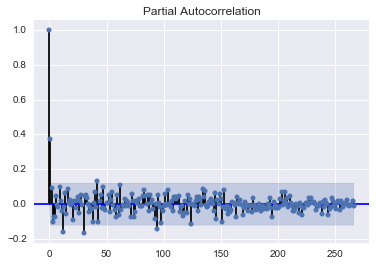

In [304]:
pacf_array = np.asarray(gdp['diff_log_gdp'])
plot_pacf(pacf_array)

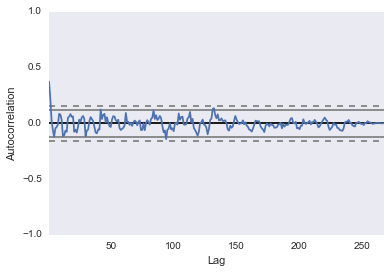

In [305]:
gdp_ac = autocorrelation_plot(gdp['diff_log_gdp'])
gdp_ac

In [306]:
# log of GDP = arima(2,1,0)
# diff log of GDP = 

In [307]:
cpi = pd.read_csv('http://people.stern.nyu.edu/churvich/Forecasting/Data/CPI.CSV')
cpi['DATE'] = pd.to_datetime(cpi['DATE'])
cpi.head()

,DATE,CPI
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [308]:
# calculate first differences of the log oc the cpi
cpi['log_cpi'] = log(cpi.CPI)
cpi['diff_log_cpi'] = cpi['log_cpi'] - cpi['log_cpi'].shift(periods = -1)
cpi.head()

,DATE,CPI,log_cpi,diff_log_cpi
0,1947-01-01,21.48,3.067122,-0.006497
1,1947-02-01,21.62,3.073619,-0.017424
2,1947-03-01,22.00,3.091042,0.000000
3,1947-04-01,22.00,3.091042,0.002275
4,1947-05-01,21.95,3.088767,-0.005905


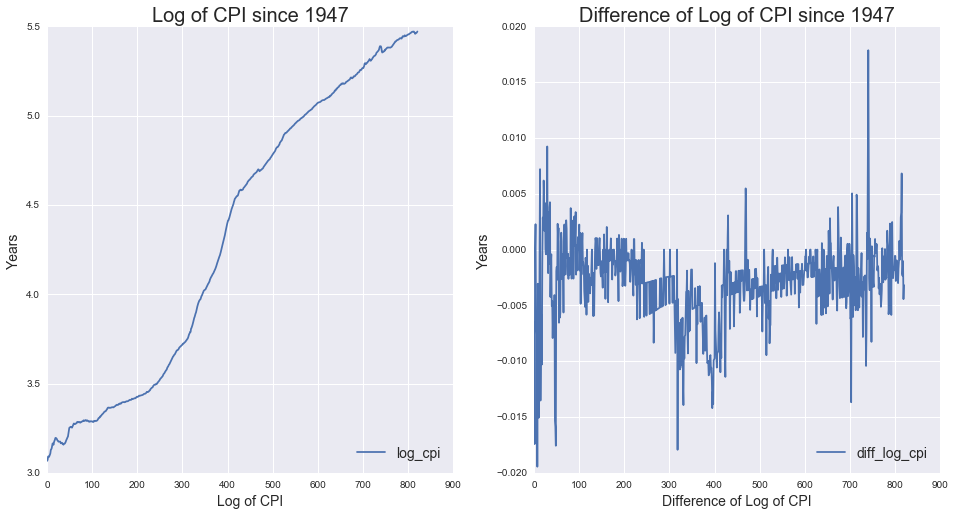

In [309]:
fig, ax = plt.subplots(figsize = (16,8))

plt.subplot(121)
plt.plot(cpi['log_cpi'])
plt.title('Log of CPI since 1947', fontsize = 20)
plt.xlabel('Log of CPI', fontsize = 14)
plt.ylabel('Years', fontsize = 14)
plt.legend(fontsize = 14, loc =4)

plt.subplot(122)
plt.plot(cpi['diff_log_cpi'])
plt.title('Difference of Log of CPI since 1947', fontsize = 20)
plt.xlabel('Difference of Log of CPI', fontsize = 14)
plt.ylabel('Years', fontsize = 14)
plt.legend(fontsize = 14, loc =4)

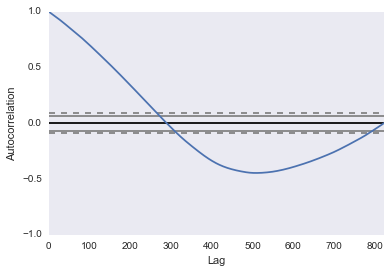

In [310]:
ac_cpi = autocorrelation_plot(cpi['log_cpi'])
ac_cpi

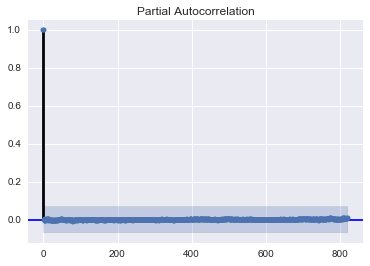

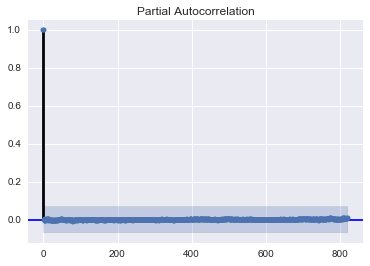

In [311]:
pacf_array = (cpi['log_cpi'].as_matrix())
plot_pacf(pacf_array)

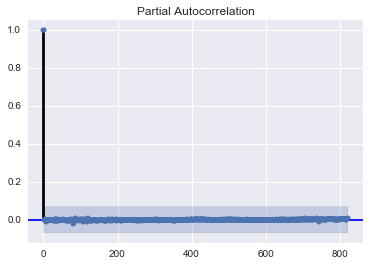

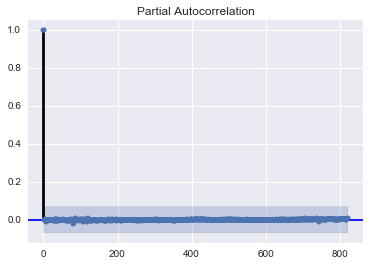

In [312]:
pacf_array = np.asarray(cpi['CPI'])
plot_pacf(pacf_array)

In [313]:
# def autocorr(x):
#     result = np.correlate(x,x,mode='full')
#     return [result, result.size/2:]

In [314]:
# question 3
gdp.head()

,DATE,GDP,Log of GDP,diff_log_gdp
DATE,,,,
1947-01-01,1947-01-01,1934.471,7.567589,0.001133
1947-04-01,1947-04-01,1932.281,7.566456,0.001018
1947-07-01,1947-07-01,1930.315,7.565438,-0.015621
1947-10-01,1947-10-01,1960.705,7.581059,-0.014597
1948-01-01,1948-01-01,1989.535,7.595656,-0.016112


In [322]:
gdp['diff_log_gdp'].autocorr(lag=2)

0.22037107718836896

In [316]:
print len(gdp)

267


In [323]:
gdp.head()

,DATE,GDP,Log of GDP,diff_log_gdp
DATE,,,,
1947-01-01,1947-01-01,1934.471,7.567589,0.001133
1947-04-01,1947-04-01,1932.281,7.566456,0.001018
1947-07-01,1947-07-01,1930.315,7.565438,-0.015621
1947-10-01,1947-10-01,1960.705,7.581059,-0.014597
1948-01-01,1948-01-01,1989.535,7.595656,-0.016112


In [324]:
gdp.tail()

,DATE,GDP,Log of GDP,diff_log_gdp
DATE,,,,
2012-07-01,2012-07-01,15431.335,9.644155,-0.000153
2012-10-01,2012-10-01,15433.702,9.644309,-0.006763
2013-01-01,2013-01-01,15538.441,9.651072,-0.004376
2013-04-01,2013-04-01,15606.591,9.655449,-0.011046
2013-07-01,2013-07-01,15779.938,9.666495,-0.008599
